In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
mat= scipy.io.loadmat('ex7faces.mat')

In [3]:
X=mat['X']
m=X.shape[0]  #5000
n=X.shape[1]   #1024
K= 100  

In [4]:
#feature normalisation
mu= np.mean(X, axis=0)
sigma=np.std(X,axis=0)
X_norm= (X-mu)/sigma

In [5]:
from scipy import linalg
#calculating covariance matrix

cov= (1/m)*(np.matmul(X_norm.T,X_norm))
U,s,V= linalg.svd(cov) # U=Eigen matrix, s=Eigen Val, V=??

In [6]:
#Dimensionality reductiom
eigval= np.argsort(s)[::-1] #indices of eigen values in descending order
Ureduce= U[:,eigval[:K]] # selecting first K vectors
Z= np.matmul(X_norm,Ureduce)

In [7]:
#Reconstructing from reduced mat
Xapprox=np.matmul(Z,Ureduce.T)


In [8]:
Xapprox.shape

(5000, 1024)

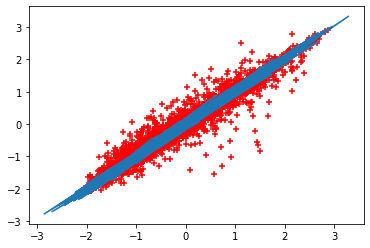

In [9]:
plt.plot(Xapprox[:,0],Xapprox[:,1])
plt.scatter(X_norm[:,0],X_norm[:,1], c='red', marker='+')
plt.show()